## Estimating mean and covariance from normal distributed data

### Introduction

In a previous notebook we demonstrated that the eigenvalues and eigenvectors of the covariance matrix contain important information about the distribution. There, we used the covariance matrix that was used to generate the data. In general we don't know this matrix and we must estimate this from the data itself. Here, we show that these estimators work reasonably well if the data is from a Gaussain distribution. If the data is not from a Gaussian distribution, this process can still be used to decorrelate the data.

### Learning Objectives
In this notebook you will learn
- how to implement maximum likelihood estimation in Python
- how to compare the estimated eigenvectors to the theoretical ones

### Exercise

There is an exercise at the end of this notebook!

[[79. 20.]
 [20. 37.]]


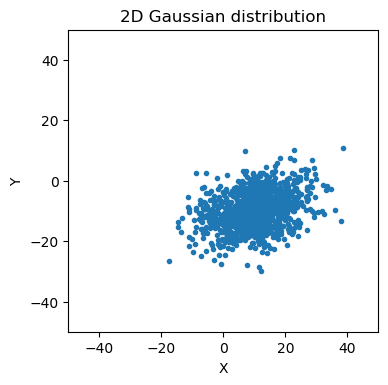

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 100

rng = default_rng()

import numpy as np
mean = [10.,-10.]

direction_1 = np.array([5,2])
direction_2 = np.array([-2,5])

cov = 3.*np.outer(direction_1,direction_1) + 1.*np.outer(direction_2,direction_2)
print(cov)

sample=rng.multivariate_normal(mean, cov, size=1000)

plt.plot(sample.T[0],sample.T[1],'.')

plt.xlabel('X')
plt.ylabel('Y')
limit=50
plt.xlim([-limit,limit])
plt.ylim([-limit,limit])
plt.title('2D Gaussian distribution')
plt.savefig('gausssample.pdf')

The mean can be estimate using
$$
\bar{x} = \frac{1}{N} \sum^{N}_{i=1} \boldsymbol{x}_i,
$$
where $N$ is the number of data points and $\boldsymbol{x}_i$ is data point $i$, i.e. a two dimensional tuple $({x_1}_i, {x_2}_i)$.

In [ ]:
mean=(np.array([sample.T[0].sum(),sample.T[1].sum()])/sample.shape[0])
print('MLE for mu is: ',mean)

MLE for mu is:  [10.07315194 -9.65846478]


(-50, 50)

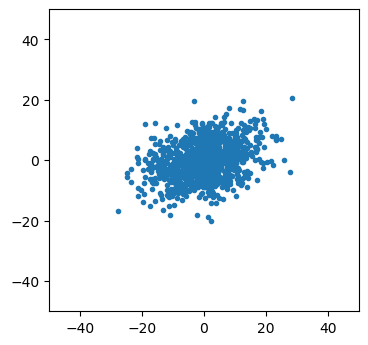

In [ ]:
diff=sample-mean
plt.plot(diff.T[0],diff.T[1],'.')
plt.xlim([-limit,limit])
plt.ylim([-limit,limit])

In [ ]:
# the following construction calculates a so-called generator of xx^T for each data point
# it is then summed over all data points
scat=sum(np.outer(x,x) for x in diff)/sample.shape[0]
print(scat)


[[79.44426926 17.66658694]
 [17.66658694 37.39615671]]


This is not a million miles from the original covariance matrix. We can calculate the eigen directions as in Example 1.6.1. We can also calculate the eigen directions of the original covariance matrix 

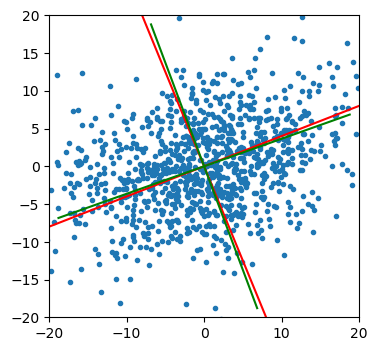

In [ ]:
eigvalues, eigvecs = np.linalg.eig(cov)

plt.plot(diff.T[0],diff.T[1],'.')

def plotEigenDirections(eigvecs,c, limit = 20):
    n_points = 100
    dir1 = limit*np.linspace(-eigvecs[:,0][0], eigvecs[:,0][0],n_points)
    dir2 = limit*np.linspace(-eigvecs[:,0][1], eigvecs[:,0][1],n_points)
    plt.plot(dir1,dir2,c)

    dir3 = limit*np.linspace(-eigvecs[:,1][0], eigvecs[:,1][0],n_points)
    dir4 = limit*np.linspace(-eigvecs[:,1][1], eigvecs[:,1][1],n_points)
    plt.plot(dir3,dir4,c)
    plt.xlim([-limit,limit])
    plt.ylim([-limit,limit])
    
plotEigenDirections(eigvecs,'r-',limit=30)
eigvaluessc, eigvecssc = np.linalg.eig(scat)
plotEigenDirections(eigvecssc,'g-')

Even if there are some numerical differences in the entries of the estimated covariance matrix and the 'true' covariance matrix, the differences in eigen directions are not visible relative to the data.

### Exercise

Your boss - who is not a great artist - comes to you and asks you to write code for a synthetic dataset that looks reasonably like the one below. Please do this. Show both a labelled and an unlabelled version of your dataset.

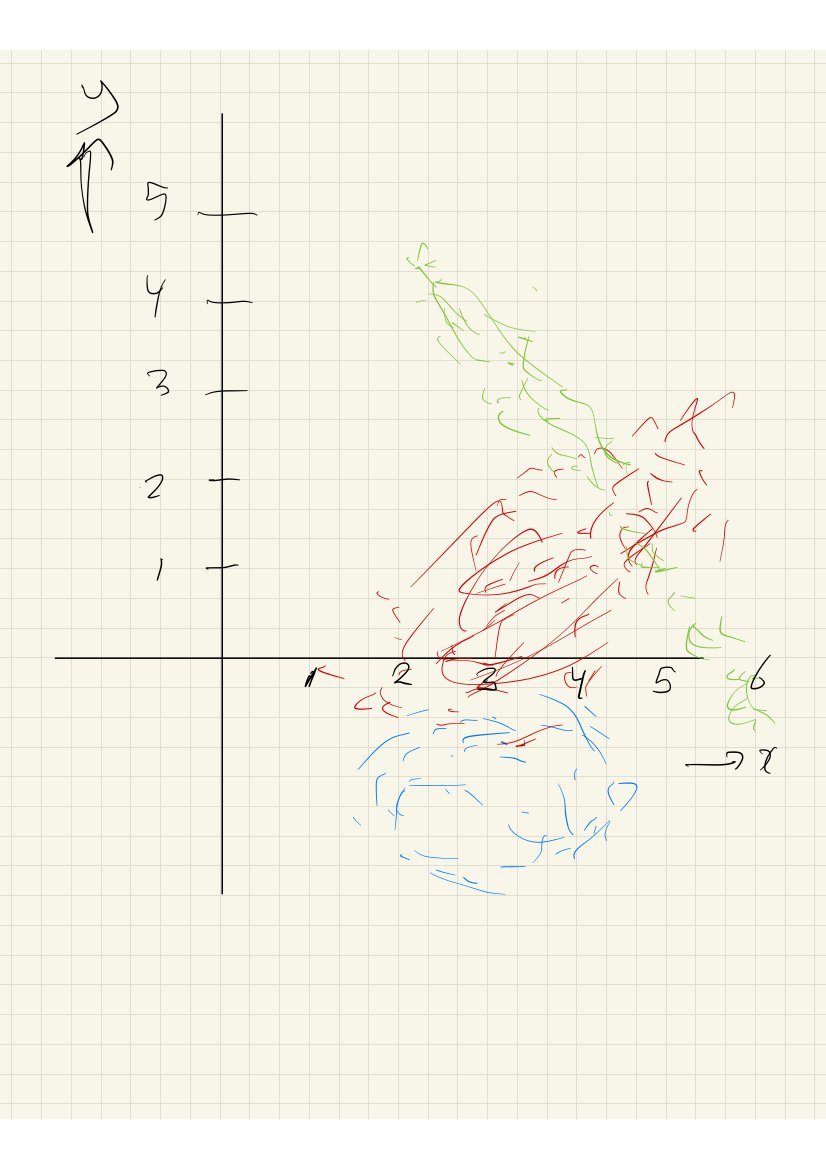

In [ ]:
from IPython.display import Image

fig = Image(filename=('./desiredsample.png'))
fig

In [ ]:
# Sample answer 


mu_1 = np.array([3,-1.5])
cov_1  = 1.*np.outer( np.array([1.,0.]),np.array([1.,0.])) + 0.2*np.outer(np.array([0.,1.]),np.array([0.,1.]))
sample_blue=rng.multivariate_normal(mu_1, cov_1, size=100)


mu_2  = np.array([4.,1.])
cov_2 = 1*np.outer( np.array([1,1]),np.array([1,1])) + 0.2*np.outer(np.array([1,-1]),np.array([1,-1]))

sample_red = rng.multivariate_normal(mu_2, cov_2, size=100)

mu_3  = np.array([4.,1.])
cov_3 = np.outer(np.array([-1.,2]),np.array([-1.,2]))  + 0.01*np.outer(np.array([2,1]),np.array([2,1]))

sample_green = rng.multivariate_normal(mu_3, cov_3, size=100)

(-3, 6)

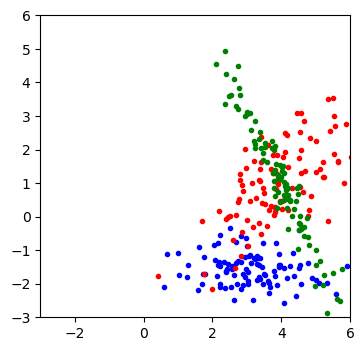

In [ ]:
plt.plot(sample_blue.T[0],sample_blue.T[1],'b.')
plt.plot(sample_red.T[0],sample_red.T[1],'r.')
plt.plot(sample_green.T[0],sample_green.T[1],'g.')
plt.xlim([-3,6])
plt.ylim([-3,6])